In [1]:
import os
import lecroyparser
import numpy as np
import scipy.signal as sig
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)

In [2]:
PATH = "../../Tests/Oscilloscope/lecroy-good"
Fs = int(5e9)

In [3]:
data = lecroyparser.ScopeData(os.path.join(PATH, "tag1.trc"))
data

Le Croy Scope Data
Path: ../../Tests/Oscilloscope/lecroy-good/tag1.trc
Endianness: <
Instrument: LECROYSDA816Zi
Instrument Number: 48456
Template Name: LECROY_2_3
Channel: Channel 1
WaveArrayCount: 20002049
Vertical Coupling: DC50
Bandwidth Limit: off
Record Type: single_sweep
Processing: No Processing
TimeBase: 500 us/div
TriggerTime: 2020-07-15 05:04:59.10

In [4]:
print(f"Number of samples: {data.waveArrayCount}, total time: {data.waveArrayCount / Fs * 1000}ms")

Number of samples: 20002049, total time: 4.0004098ms


In [5]:
mag = np.sqrt(data.y * data.y + data.x * data.x)

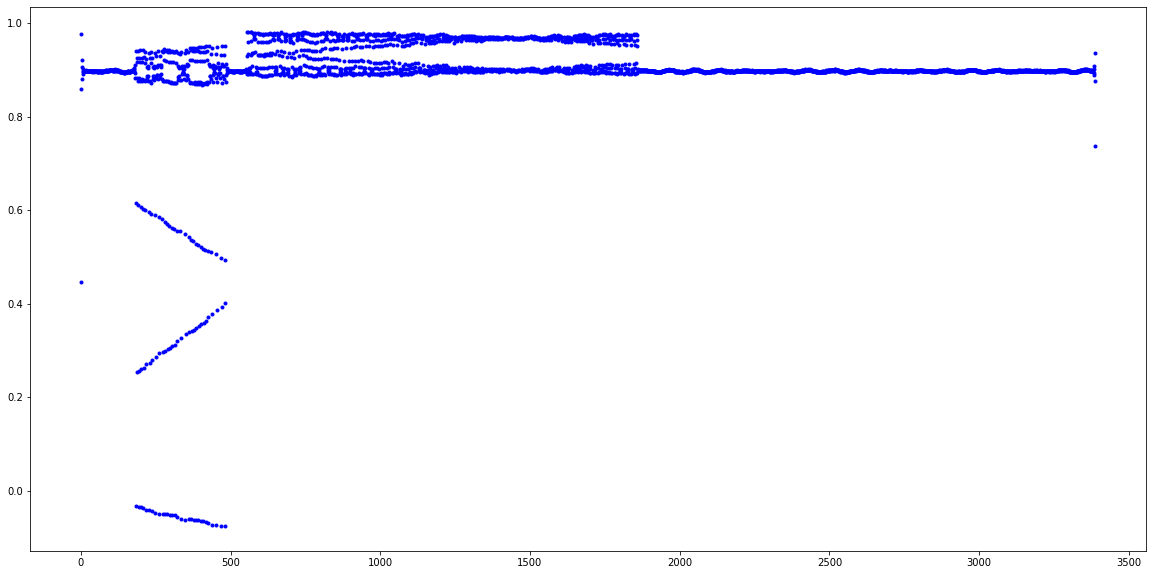

In [15]:
resampled = sig.resample_poly(mag, 847, int(5e6))
plt.plot(resampled, 'b.')

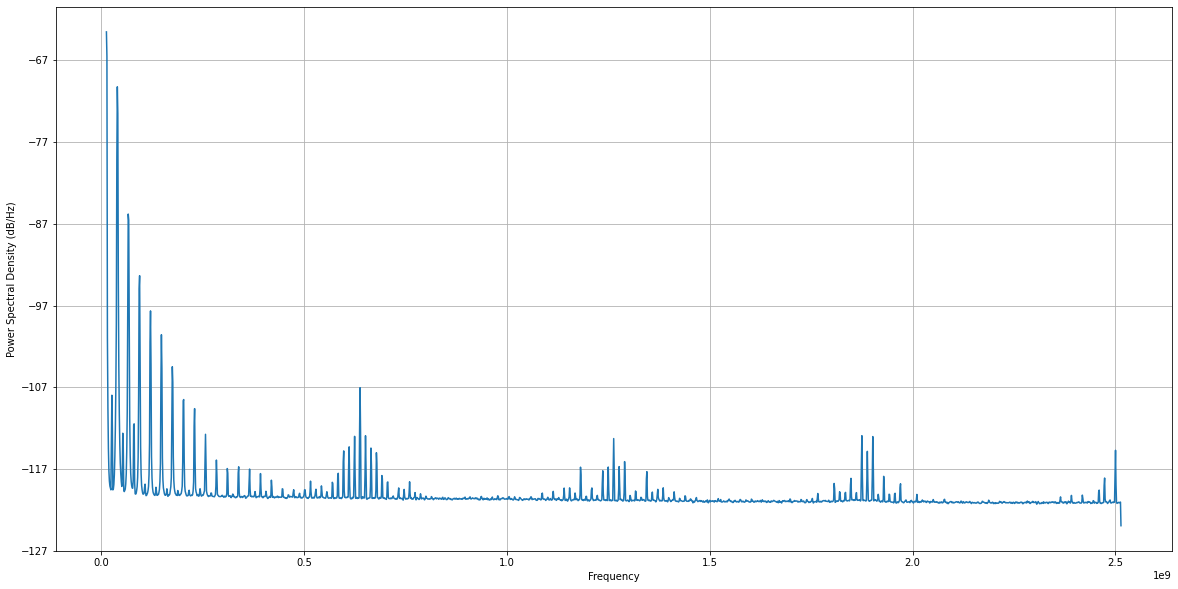

In [7]:
plt.psd(mag, NFFT=4096, Fs=int(5e9), Fc=13_560_000)
plt.show()

## Calculate signal power

In [79]:
def signal_power(signal):
    """Return the RF power of the signal in dBm (decibel-milliwatts) AAAAAAAAAAAAAAAAAAHHHHHHHHHHHHHHHHHHHH
    Considering a 50 ohms impedance system (like most RF systems)
    """
    power = pow(np.real(signal), 2) + pow(np.imag(signal), 2)
    db = 10 * np.log10(power)
    return db

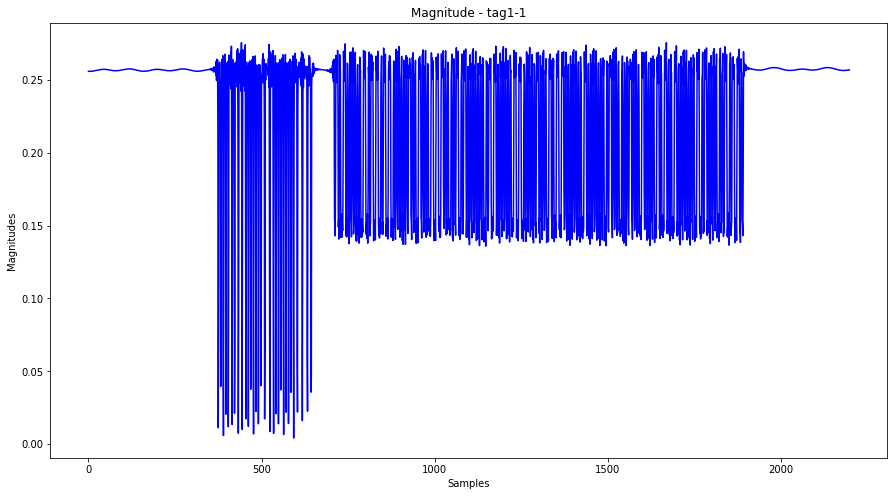

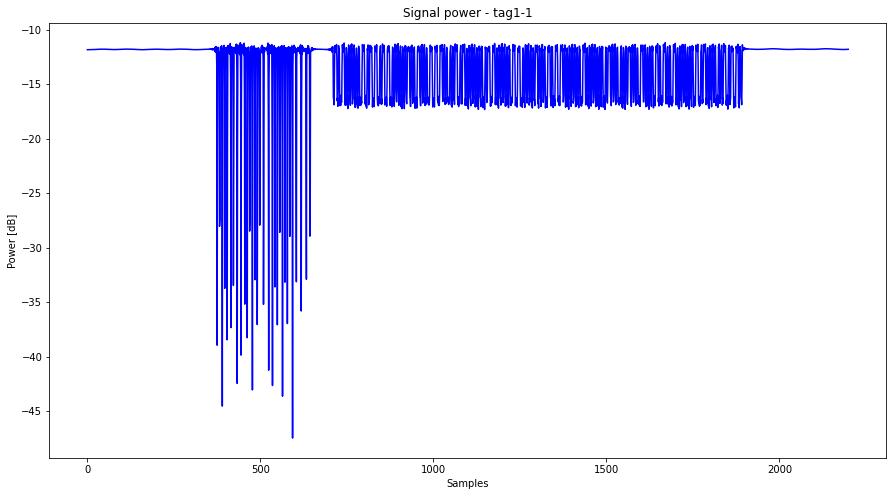

In [74]:
plt.figure(figsize=(15, 8))
plt.plot(np.abs(signals[0][1][14000:16200]), 'b-')
plt.xlabel("Samples")
plt.ylabel("Magnitudes")
plt.title("Magnitude - {}".format(signals[0][0]))
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(signal_power(signals[0][1][14000:16200]), 'b-')
plt.xlabel("Samples")
plt.ylabel("Power [dB]")
plt.title("Signal power - {}".format(signals[0][0]))
plt.show()